## REGRESSION ASIA COUNTRIES

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../data/Asia.csv")
data

,Unnamed: 0,Country,Exports_2014,Exports_2015,Exports_2016,Exports_2017,Exports_2018,Exports_2019,Exports_2020,Exports_2021,...,Inflation_2022,Openness_2014,Openness_2015,Openness_2016,Openness_2017,Openness_2018,Openness_2019,Openness_2020,Openness_2021,Openness_2022
0,1,Bangladesh,29230.005539,30029.299084,30903.584025,35501.954340,41062.647812,41918.996690,36957.276700,59949.066008,...,7.696954,9.999221,9.192845,6.959211,7.223964,7.611230,7.171236,5.966191,8.473435,8.904685
1,2,Brunei Darussalam,2996.122479,2408.143278,1401.634799,1456.480639,2459.303028,2414.828419,2315.852901,3637.447446,...,3.682250,17.108577,16.145120,13.340710,15.435092,16.734837,17.949469,24.239308,30.418156,32.843882
2,3,Cambodia,11536.022289,11986.376973,11832.566629,13858.214700,18567.832293,21209.647772,19824.908218,25133.044730,...,5.343703,42.466432,42.435839,38.745103,41.006343,47.337626,50.896270,48.381255,64.043808,67.960176
3,5,"Fiji, Rep. of",527.634375,547.539494,675.485558,627.371933,731.277077,584.014363,502.129618,674.672129,...,4.520193,8.593720,8.799957,9.271447,7.921026,8.489630,7.276540,8.435227,10.438728,11.807070
4,6,India,293233.544055,226257.676511,210189.410153,252435.495568,303901.788412,279941.294306,217290.917302,332878.934322,...,6.699034,10.812619,8.480467,7.294639,7.529210,8.687995,7.916290,6.787020,8.473027,9.528872
5,7,Indonesia,88948.937218,70527.042987,67606.349295,74966.034853,90537.922674,89650.538790,78226.581854,113180.831592,...,4.209464,9.936178,8.655025,7.747268,8.462547,9.416070,8.767628,8.458824,11.272901,12.752325
6,8,Lao People's Dem. Rep.,6463.327001,6083.421136,5535.198678,5959.360071,6396.148843,6445.185827,5488.558661,6288.314049,...,22.956223,39.844332,33.301674,29.434750,30.506472,32.182807,31.565319,29.729349,35.482256,51.587699
7,9,Malaysia,99015.282032,86106.833228,73963.814712,90254.853999,96442.031234,104077.905047,103685.557982,137306.320555,...,3.378699,34.147014,34.462253,31.275287,33.930626,33.405140,35.096601,36.886697,43.910684,48.210248
8,10,Maldives,1153.706879,1022.755842,1309.042486,1417.778729,1705.738752,1588.074679,1055.152479,1956.488636,...,2.333143,16.466073,13.441391,16.623954,17.841226,19.793159,15.356938,15.689178,28.503119,24.507651
9,11,"Micronesia, Federated States of",72.897523,71.913627,332.026436,350.885546,591.720018,196.328385,206.441667,192.430972,...,5.408744,14.293258,13.880843,56.427774,61.961343,93.167660,49.530115,50.675608,51.667194,53.843784


In [3]:
data = data.drop(['Unnamed: 0', 'Country'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
for year in range(2014, 2023):
    # Logarithmic transformation of the columns
    data[f'log_GDP_{year}'] = np.log(data[f'GDP_{year}'] + 1)
    data[f'log_Exports_{year}'] = np.log(data[f'Exports_{year}'] + 1)
    data[f'log_Imports_{year}'] = np.log(data[f'Imports_{year}'] + 1)
    data[f'log_Inflation_{year}'] = np.log(data[f'Inflation_{year}'] + 1)
    data[f'log_Openness_{year}'] = np.log(data[f'Openness_{year}'] + 1)

# Analyse for each year
for year in range(2014, 2023):
    cols = [f'log_Exports_{year}', f'log_Imports_{year}', f'log_Inflation_{year}', f'log_GDP_{year}']

    # Drop NA
    data_year = data.dropna(subset=cols)

    # Independent and dependent variables
    X = data_year[[f'log_Exports_{year}', f'log_Imports_{year}', f'log_Inflation_{year}', f'log_Openness_{year}']]
    Y = data_year[f'log_GDP_{year}']

    # Train and test split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediction and evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Year: {year}")
    print("Coefficients:", model.coef_)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R²):", r2)
    print()


Year: 2014
Coefficients: [ 0.63206807  0.33366086  0.06812101 -1.05060175]
Mean Squared Error (MSE): 0.001083158089779164
R-squared (R²): 0.999580598407137

Year: 2015
Coefficients: [ 0.55403139  0.41023413  0.01149946 -0.97515514]
Mean Squared Error (MSE): 0.021866314126141748
R-squared (R²): 0.9921611295334893

Year: 2016
Coefficients: [ 0.55174975  0.42067029  0.12240358 -0.99361699]
Mean Squared Error (MSE): 0.02370838012478738
R-squared (R²): 0.9950963522822344

Year: 2017
Coefficients: [ 0.57115186  0.41009518 -0.06640089 -1.06329702]
Mean Squared Error (MSE): 0.014334426357799081
R-squared (R²): 0.9974808832065932

Year: 2018
Coefficients: [ 5.61743077e-01  4.20832908e-01 -5.97230421e-04 -1.03071962e+00]
Mean Squared Error (MSE): 0.027570086727559125
R-squared (R²): 0.9908304834680046

Year: 2019
Coefficients: [ 0.60832181  0.37950774 -0.09402928 -1.03911318]
Mean Squared Error (MSE): 0.05211119372673968
R-squared (R²): 0.9833161407725455

Year: 2020
Coefficients: [ 0.64163748  

C:\Users\Manjaka\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Manjaka\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Manjaka\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


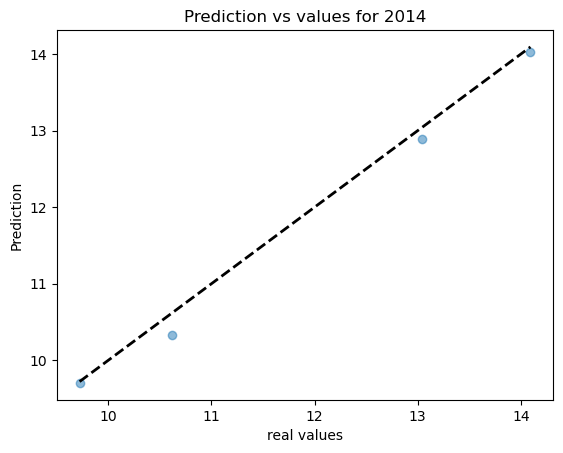

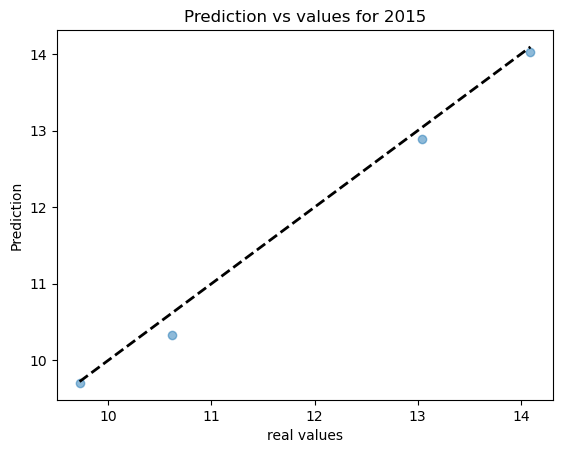

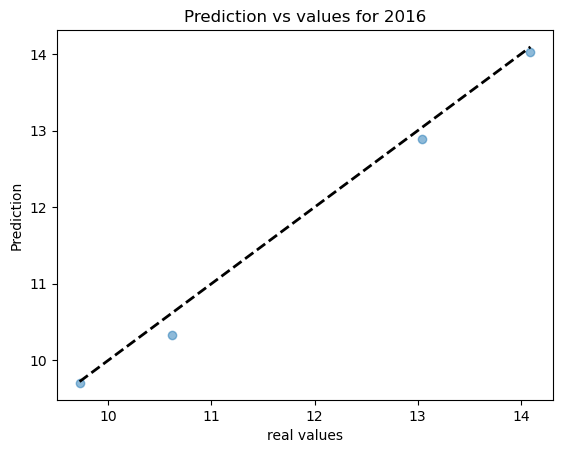

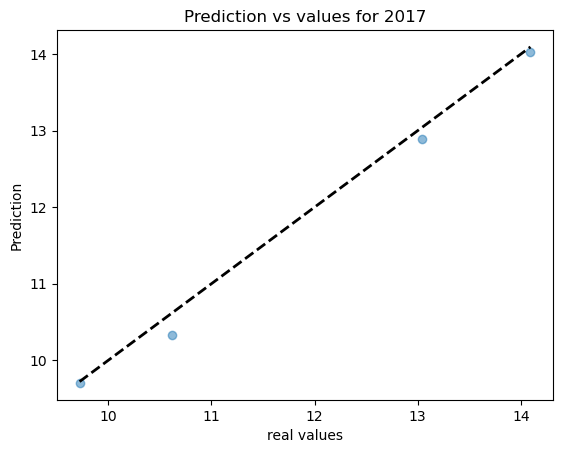

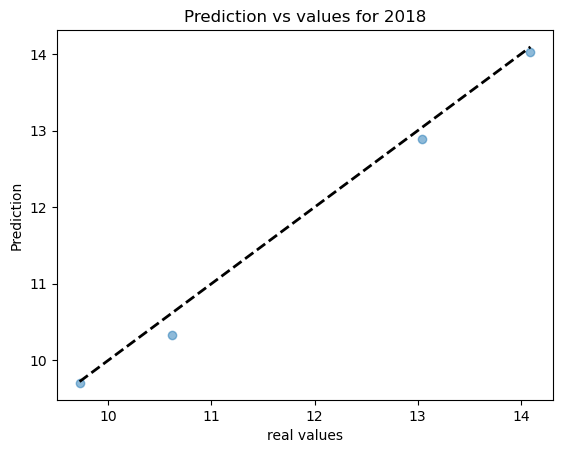

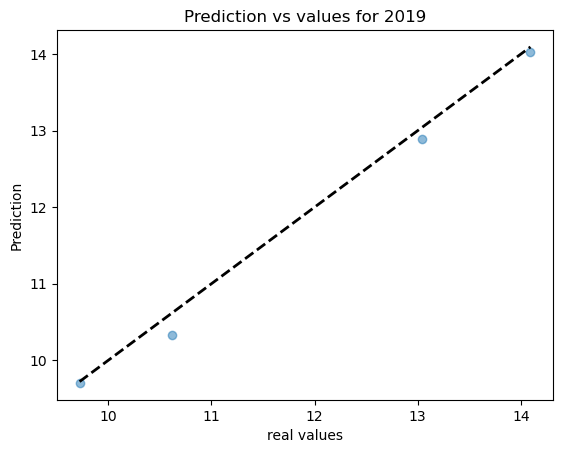

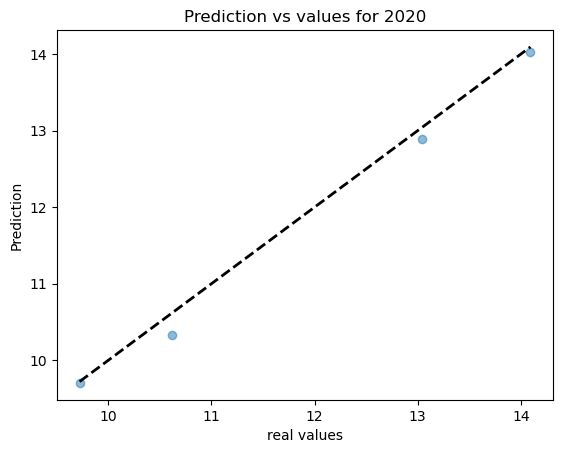

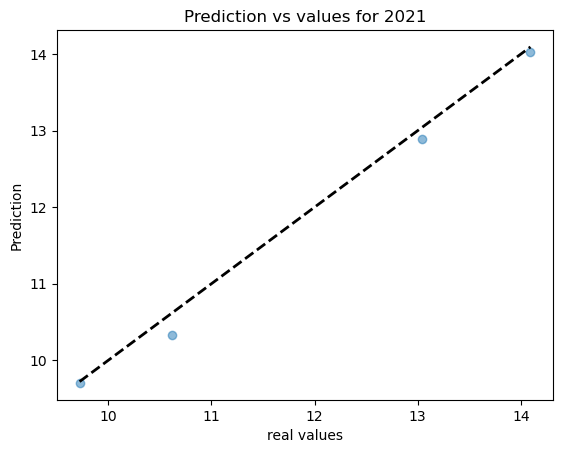

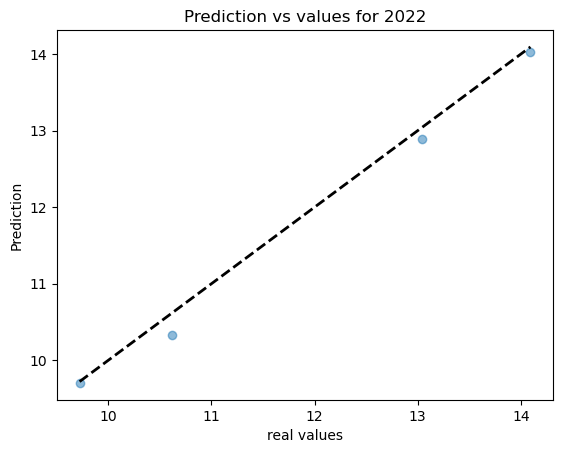

In [6]:
for year in range(2014, 2023):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('real values')
    plt.ylabel('Prediction')
    plt.title(f'Prediction vs values for {year}')
    plt.show()